In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
import cv2 
import numpy as np
from glob import glob
from tqdm import tqdm
import os

import string 
import random

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')  # or yolov5n - yolov5x6, custom

In [15]:
def get_random_string(length):
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

In [24]:
path_save = './data/crop_unlabel_data'
for img_path in tqdm(glob('./data/raw_unlabel_data/*.jpg')):
    results = model(img_path)
    a = results.crop(save=False)
    im = cv2.imread(img_path)
    for dic in a:
        lst = dic['box']
        lst = [int(i) for i in lst]
        conf = float(dic['conf'])
        cls = int(dic['cls'])
        if cls==0 and conf>0.5:
            crop = im[lst[1]:lst[3], lst[0]:lst[2]]
            w,h,_ = crop.shape
            if w*h>=100*100:
                name = get_random_string(10)
                cv2.imwrite(os.path.join(path_save, name+'.jpg'), crop)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6262/6262 [03:55<00:00, 26.56it/s]


In [42]:
def visualize_random_data(list_path):
    fig, axs = plt.subplots(2, 5, figsize=(12,14))
    row, col = 0, 0
    for i in range(10):
        index = random.randint(0, len(list_path))
        img = Image.open(list_path[index])
        axs[row, col].imshow(img)
        axs[row, col].set_xticks([])
        axs[row, col].set_yticks([])
        col+=1
        if col==5:
            col=0
            row=1
    plt.show()

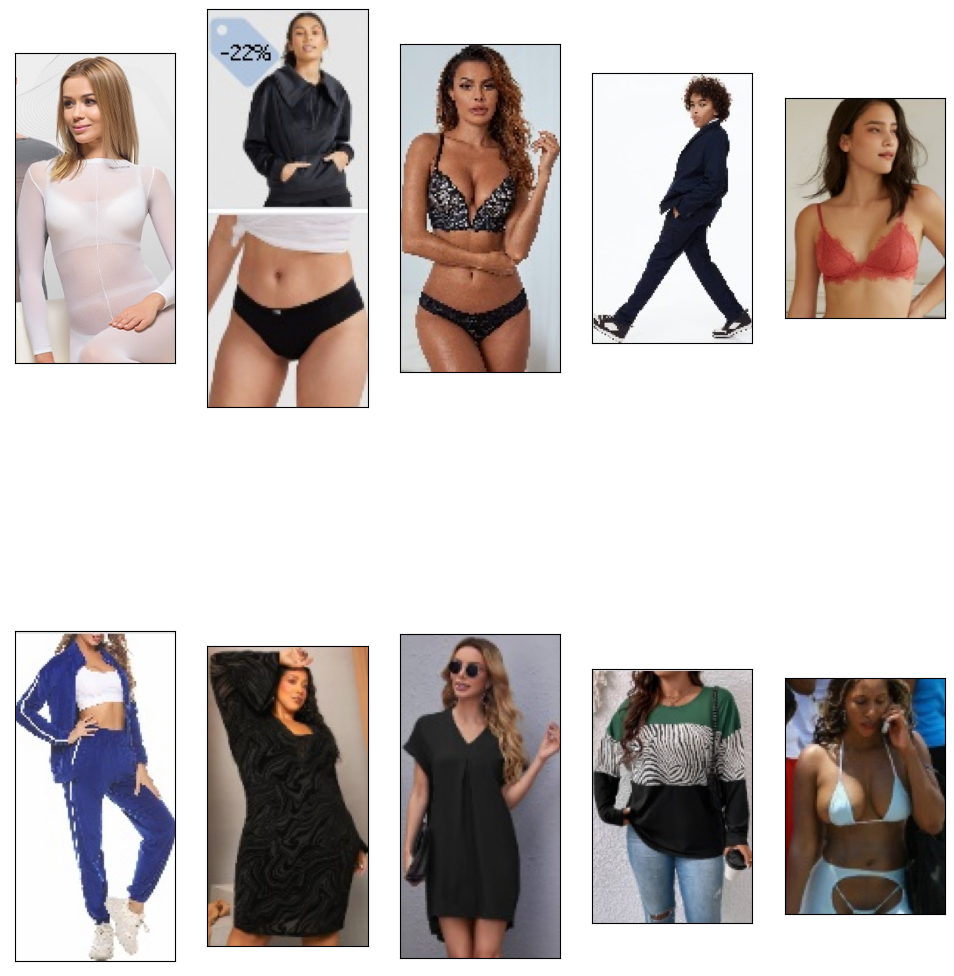

In [45]:
list_path = glob('./data/crop_unlabel_data/*.jpg')
visualize_random_data(list_path)